# Script: 2 - cleaned_data_overview
<h4><span style="color:blue">Juan José Hoyos Urcué</span></h4>

## Dataset and python libraries upload

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import util_exploration as util
import random


file_name = "cleaned.xlsx"
data = pd.read_excel(file_name, na_values = ["999.0","888.0","999","888"])

In [2]:
# dataset preview

data.head()

,gender,ethnicity,age,evolution_time,weight,height,number_active_injuries,prescribed_medication,glucantime_dosage,cure_or_fail,infection_department,injury_horizontal,ulcer_horizontal,injury_vertical,ulcer_vertical,injury_area,ulcer_area
0,1,3,44,4.0,81.199997,167.0,1,0,1.8,0,META,63.400002,46.799999,62.500000,14.2,3112.140297,521.944188
1,1,1,21,2.0,102.000000,182.0,4,0,1.4,0,CAUCA,5.200000,NaN,4.800000,NaN,19.603538,NaN
2,1,1,21,2.0,102.000000,182.0,4,0,1.4,0,CAUCA,6.400000,NaN,7.200000,NaN,36.191147,NaN
3,1,1,21,2.0,102.000000,182.0,4,0,1.4,0,CAUCA,12.000000,NaN,16.200001,NaN,152.681410,NaN
4,1,1,21,2.0,102.000000,182.0,4,0,1.4,0,CAUCA,31.500000,NaN,15.800000,NaN,390.892671,NaN


## Special NaN verifications

In [3]:
# There are columns where number 8 means NaN
def na_8(column):
    print(column,"-->",len(data[data[column] == 8]))

na_8("gender")
na_8("ethnicity")

# if 0 it means no NaNs values for this columns

gender --> 0
ethnicity --> 0


## Dataset Shape

In [4]:
rows, cols = data.shape
print("{} rows and {} columns .".format(rows, cols))

474 rows and 17 columns .


## Datatypes 

In [5]:
data. dtypes

gender                      int64
ethnicity                   int64
age                         int64
evolution_time            float64
weight                    float64
height                    float64
number_active_injuries      int64
prescribed_medication       int64
glucantime_dosage         float64
cure_or_fail                int64
infection_department       object
injury_horizontal         float64
ulcer_horizontal          float64
injury_vertical           float64
ulcer_vertical            float64
injury_area               float64
ulcer_area                float64
dtype: object

## Initial Statistical Description

In [6]:
data.describe()

,gender,ethnicity,age,evolution_time,weight,height,number_active_injuries,prescribed_medication,glucantime_dosage,cure_or_fail,injury_horizontal,ulcer_horizontal,injury_vertical,ulcer_vertical,injury_area,ulcer_area
count,474.000000,474.000000,474.000000,474.000000,474.000000,346.000000,474.000000,474.000000,474.000000,474.000000,470.00000,401.000000,470.000000,401.000000,470.000000,401.000000
mean,0.611814,1.708861,17.021097,4.901266,40.620534,124.742004,3.265823,0.521097,11.489634,0.177215,23.38117,13.182968,21.789128,11.502618,533.479339,171.220953
std,0.487852,0.962096,15.050850,27.441100,24.426432,23.759116,2.173503,0.500083,8.948272,0.382254,14.20912,9.597008,13.837654,8.579089,883.136831,303.036697
min,0.000000,1.000000,2.000000,1.000000,10.000000,83.000000,1.000000,0.000000,1.372549,0.000000,1.30000,0.000000,1.300000,0.000000,1.327323,0.000000
25%,0.000000,1.000000,7.000000,1.000000,20.000000,105.333336,1.000000,0.000000,2.300000,0.000000,13.00000,6.780000,12.612500,6.000000,131.946891,28.515295
50%,1.000000,1.000000,10.000000,2.000000,30.000000,124.000000,3.000000,1.000000,18.681318,0.000000,20.00000,10.000000,19.000000,9.000000,298.451302,70.685835
75%,1.000000,3.000000,27.000000,3.000000,65.000000,137.916668,5.000000,1.000000,19.983156,0.000000,30.00000,18.000000,27.825000,15.000000,636.690645,209.524123
max,1.000000,5.000000,65.000000,421.000000,102.000000,182.000000,8.000000,1.000000,36.400002,1.000000,130.00000,79.000000,133.000000,65.000000,13579.534245,4033.019569


In [7]:
# mode per variable

pd.DataFrame(data.mode().iloc[0])

,0
gender,1.0
ethnicity,1.0
age,7.0
evolution_time,1.0
weight,15.0
height,132.0
number_active_injuries,1.0
prescribed_medication,1.0
glucantime_dosage,2.3
cure_or_fail,0.0


## Missing Values

### By rows

In [8]:
by_row = list()
for i in range(len(data.index)) :
    num_na = data.iloc[i].isnull().sum()
    
    if num_na > 0:
        by_row.append(("Row "+str(i),num_na))

pd.DataFrame(by_row, columns = ["Row","Number of NaN values"]).style.hide_index()

Row,Number of NaN values
Row 1,3
Row 2,3
Row 3,3
Row 4,3
Row 5,3
Row 6,3
Row 7,3
Row 15,3
Row 16,3
Row 17,3


### By columns

In [9]:
columns_na = data.columns[data.isna().any()].to_list()
by_col = list()

for col in columns_na:
    info = (col,data[col].isna().sum())
    by_col.append(info)
    
pd.DataFrame(by_col, columns = ["Variable","Number of NaN values"]).style.hide_index()

Variable,Number of NaN values
height,128
injury_horizontal,4
ulcer_horizontal,73
injury_vertical,4
ulcer_vertical,73
injury_area,4
ulcer_area,73


## Trend of Demographic Variables

/Users/jhoyosu/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jhoyosu/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 11.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

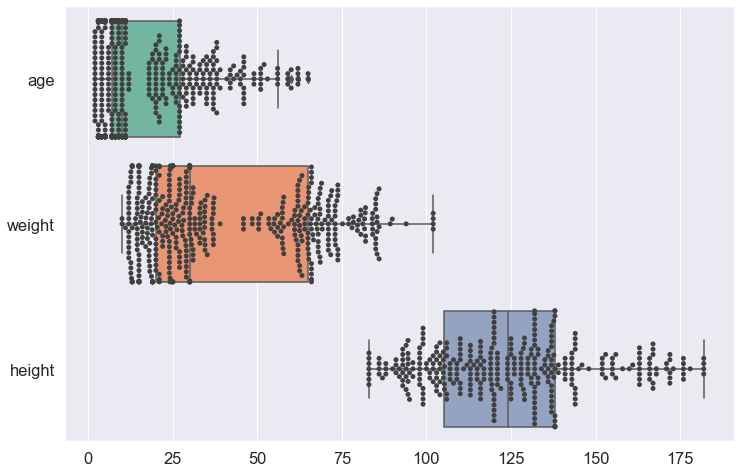

In [10]:
demografico = data[['age', 'weight','height']]
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale = 1.5)
sns.boxplot(data=demografico, orient="h", palette="Set2")
sns.swarmplot(data=demografico, orient="h", color=".25")

## Trend of Variables Associated with Injury

evolution_time


/Users/jhoyosu/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 86.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


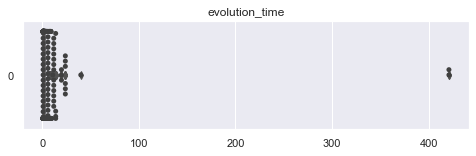

number_active_injuries


/Users/jhoyosu/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


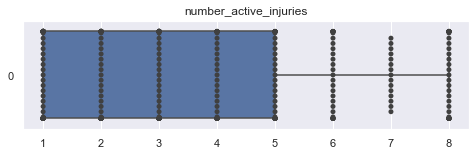

injury_horizontal


/Users/jhoyosu/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 27.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


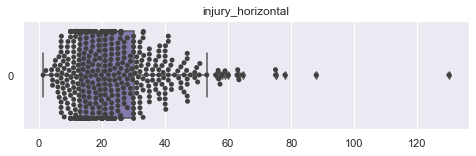

ulcer_horizontal


/Users/jhoyosu/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


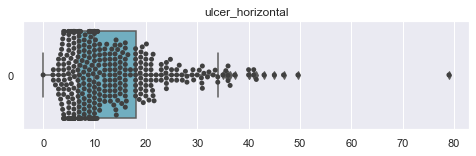

injury_vertical


/Users/jhoyosu/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


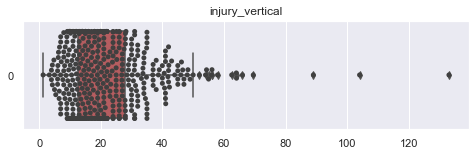

ulcer_vertical


/Users/jhoyosu/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 20.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


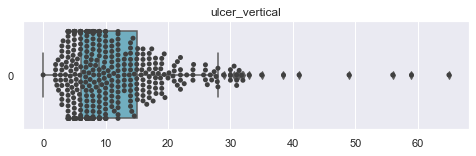

injury_area


/Users/jhoyosu/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 63.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


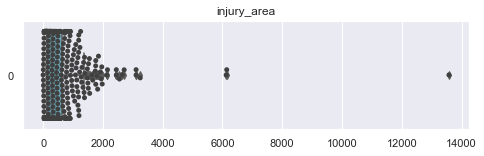

ulcer_area


/Users/jhoyosu/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


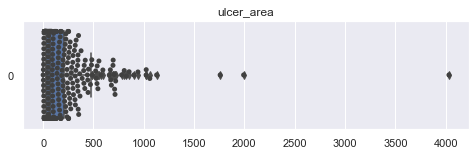

In [11]:
to_delete = ['gender','ethnicity', 'infection_department','glucantime_dosage',
             'cure_or_fail','age', 'weight','height',
            "prescribed_medication"]
others = list(data.columns)

for elem in to_delete:
    others.remove(elem)

colors = ["b","g","r","c","m"]
for elem in others:
    print(elem)
    sns.set(rc={'figure.figsize':(8,2)})
    sns.boxplot(data = data[elem], orient = "h", color = random.choice(colors))
    sns.swarmplot(data = data[elem], orient = "h", color = ".25")
    plt.title(elem)
    plt.show()

## Correlation Matrix

<AxesSubplot:>

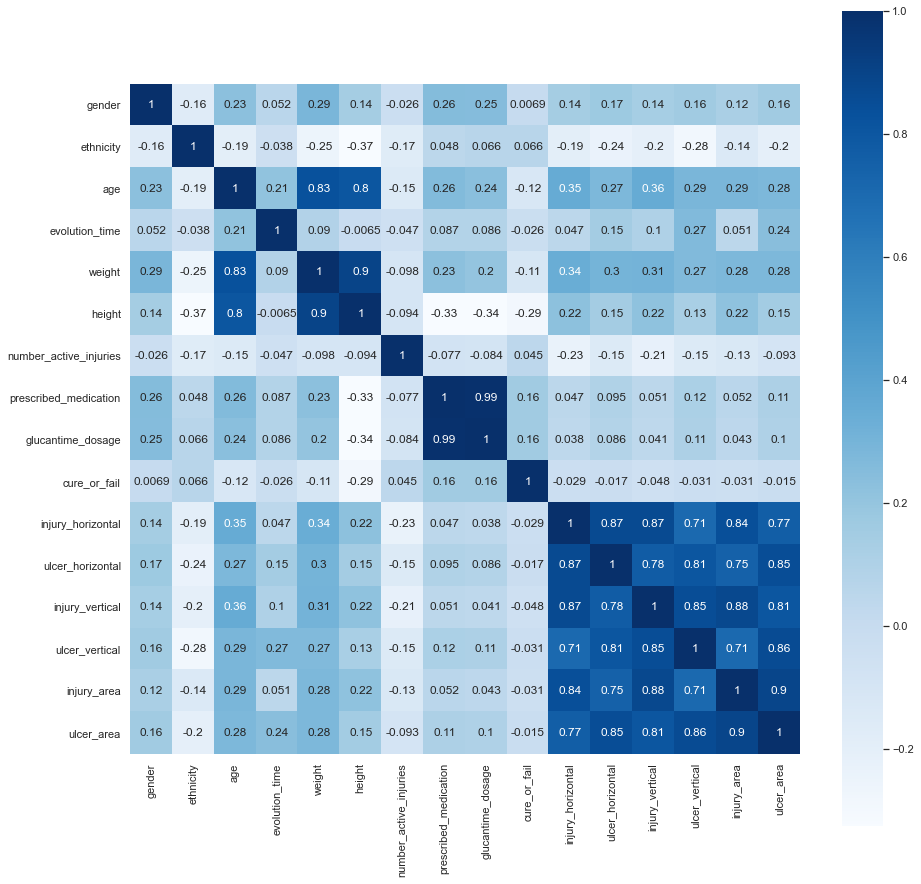

In [12]:
size = 15
plt.figure(figsize = (size,size))
sns.heatmap(data.corr(), square = True, annot=True, cmap = "Blues", robust = True)

## Pairs of Variables with Correlation greater 0.85

In [13]:
correlated = util.show_correlated(data,0.85)
first = list(set([to_delete[i][0] for i in range(len(to_delete))]))
correlated

,VAR_1,VAR_2,CORR
0,weight,height,0.898132
1,prescribed_medication,glucantime_dosage,0.994720
2,injury_horizontal,ulcer_horizontal,0.868046
3,injury_horizontal,injury_vertical,0.865390
4,ulcer_horizontal,ulcer_area,0.854740
5,injury_vertical,ulcer_vertical,0.851303
6,injury_vertical,injury_area,0.876493
7,ulcer_vertical,ulcer_area,0.862455
8,injury_area,ulcer_area,0.895762


## Distribution of the Target Variable

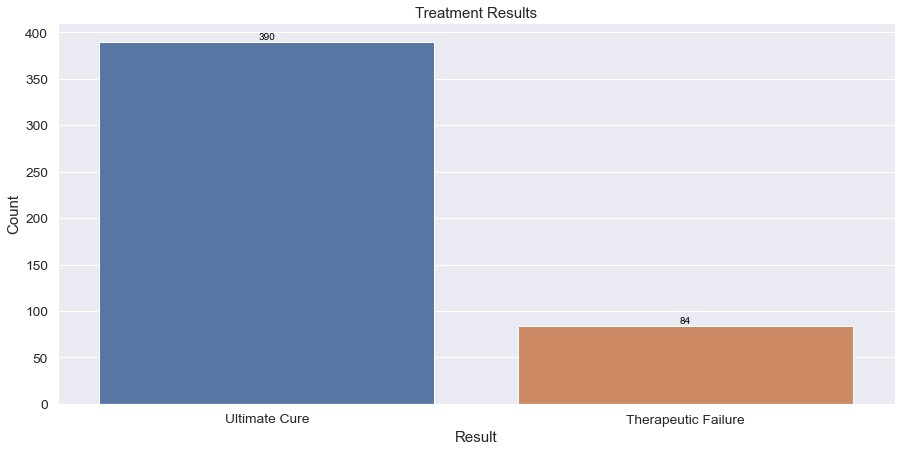

In [14]:
labels = ["Ultimate Cure","Therapeutic Failure"]
values = [data["cure_or_fail"].value_counts()[i] for i in range(len(labels))]

target_data = pd.DataFrame(zip(labels,values), columns = ["Result", "Count"])
util.plot_class_distr(target_data)

Summarizing all the information provided by each activity, the following pre-processing
plan was established:


    - (a) Eliminate non-useful records based on the target variable (Nan, excluded patients, loss
          patients tracking and non-Glucantime patients treated ).
          
    - (b) Transform infection_department into numerical scale.
    
    - (c) Eliminate one of the attributes for each pair of attributes that have a correlation coefficient greater than 0.85.

    - (d) Normalize the data set.